In [1]:
import torch

torch.manual_seed(1)

In [2]:
import glob

tiles_folders = glob.glob("../data/digital_leaders/tiles/*")
len(tiles_folders)

5

In [3]:
from sklearn.model_selection import train_test_split
import os

train_folders, val_folders = train_test_split(tiles_folders, test_size=0.2)
train_paths = []
val_paths = []
for folder in train_folders:
    train_paths.extend(glob.glob(os.path.join(folder, "images", "*.png")))
for folder in val_folders:
    val_paths.extend(glob.glob(os.path.join(folder, "images", "*.png")))
len(train_paths), len(val_paths)

(647, 96)

In [4]:
from torch.utils.data import Dataset
import cv2


class TileDataset(Dataset):
    def __init__(self, paths, transforms=None):
        self.paths = paths
        self.transforms = transforms

    def __len__(self):
        return len(self.paths)

    def __getitem__(self, idx):
        path = self.paths[idx]
        image = cv2.imread(path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        mask_path = path.replace("images", "masks").replace("tile_", "mask_tile_")
        mask = cv2.imread(mask_path)[:, :, 0]
        if self.transforms is not None:
            image, mask = self.transforms(image, mask)
        return image, mask

In [5]:
train_dataset = TileDataset(train_paths)
val_dataset = TileDataset(val_paths)

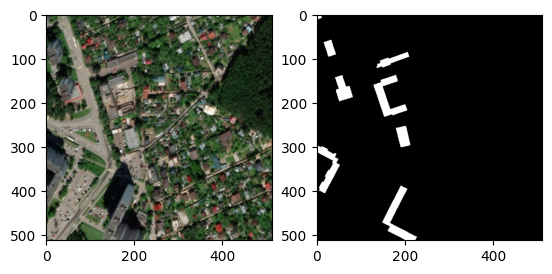

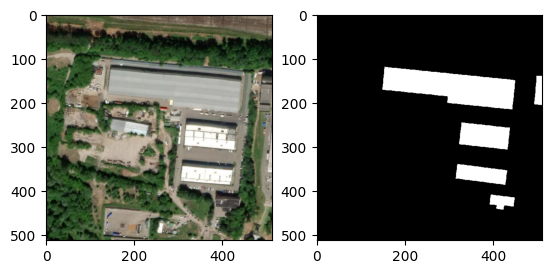

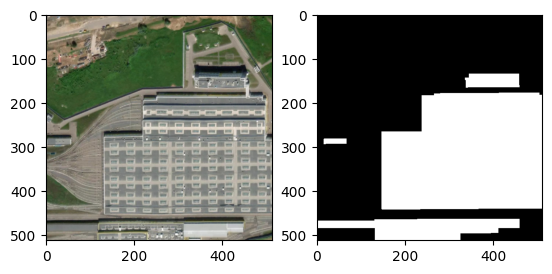

In [7]:
import matplotlib.pyplot as plt

k = 0
for image, mask in train_dataset:
    plt.subplots(1, 2)
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.subplot(1, 2, 2)
    plt.imshow(mask, cmap="gray")
    plt.show()
    
    k += 1
    if k == 3:
        break